In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [155]:
reddit = pd.read_csv("./reddit_res/reddit_sentiment_comment_vader.csv")
twitter = pd.read_feather('./twitter_res/twitter_new_analysis.ftr')

#reddit["negativeSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][0])
#reddit["neutralSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][1])
#reddit["positiveSentimentScore"] = reddit["Scores"].map(lambda x: eval(x)[0][2])
reddit.rename(columns={'Negative': 'negativeSentimentScore', "Positive": "positiveSentimentScore", "Neutral": "neutralSentimentScore"}, inplace=True)
reddit['created'] = pd.to_datetime(reddit['created'])

twitter["negativeSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[0])
twitter["neutralSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[1])
twitter["positiveSentimentScore"] = twitter["sentimentScore"].map(lambda x: x[2])


In [156]:
reddit = reddit.groupby(reddit["created"].dt.to_period('D')).filter(lambda x: len(x) >= 5)

In [157]:
twitter['tweet_ts'] = pd.to_datetime(twitter['tweet_ts'])
twitter = twitter.groupby(twitter["tweet_ts"].dt.to_period('D')).mean().reset_index()
twitter['tweet_ts'] = pd.PeriodIndex(twitter['tweet_ts'], freq='D').to_timestamp()
twitter = twitter.sort_values(by=['tweet_ts'])
twitter = twitter.rename(columns={'tweet_ts': 'date'})
twitter

,date,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,2021-12-29,0.288798,0.507556,0.203646
1,2021-12-30,0.301905,0.495676,0.202420
2,2021-12-31,0.332304,0.448672,0.219024
3,2022-01-01,0.278762,0.443157,0.278081
4,2022-01-02,0.244493,0.504610,0.250897
...,...,...,...,...
464,2023-11-04,0.224787,0.531090,0.244123
465,2023-12-01,0.269071,0.521322,0.209607
466,2023-12-02,0.246236,0.547062,0.206702
467,2023-12-03,0.296639,0.521209,0.182152


In [158]:
reddit = reddit.groupby(reddit["created"].dt.to_period('D')).mean().reset_index()
reddit['created'] = pd.PeriodIndex(reddit['created'], freq='D').to_timestamp()
reddit = reddit.sort_values(by=['created'])
reddit = reddit.rename(columns={'created': 'date'})
reddit

,date,Unnamed: 0,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound
0,2021-08-11,3772.714286,0.086464,0.154821,0.758750,0.192989
1,2022-07-30,3733.076923,0.095500,0.239654,0.664885,0.259492
2,2022-11-21,3673.121212,0.088167,0.184606,0.727227,0.181368
3,2022-11-22,3682.600000,0.066600,0.117800,0.815600,0.113770
4,2023-01-13,4833.615385,0.090385,0.111077,0.798538,0.116462
...,...,...,...,...,...,...
71,2023-05-20,5231.678092,0.116833,0.190128,0.691560,0.147312
72,2023-05-21,4327.582353,0.083053,0.210706,0.706247,0.212309
73,2023-05-22,2565.351942,0.112015,0.199192,0.688762,0.184027
74,2023-05-23,3692.420382,0.099134,0.176083,0.724739,0.210125


In [159]:
twitter["gradient_neg"] = twitter["negativeSentimentScore"].diff()
twitter["gradient_pos"] = twitter["positiveSentimentScore"].diff()
twitter = twitter.sort_values(by="gradient_neg")
twitter


,date,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore,gradient_neg,gradient_pos
182,2022-07-01,0.254396,0.507394,0.238210,-0.103144,0.060859
393,2023-02-13,0.222197,0.527341,0.250462,-0.097111,0.053753
124,2022-05-04,0.280967,0.513276,0.205757,-0.088672,-0.080552
464,2023-11-04,0.224787,0.531090,0.244123,-0.087431,0.062575
155,2022-06-04,0.259605,0.512802,0.227593,-0.086647,0.046778
...,...,...,...,...,...,...
280,2022-10-07,0.343008,0.473447,0.183545,0.105234,-0.058180
181,2022-06-30,0.357540,0.465109,0.177351,0.106896,-0.057953
113,2022-04-23,0.268631,0.478755,0.252613,0.109946,-0.154014
36,2022-02-03,0.365868,0.419921,0.214211,0.121227,-0.029245


In [160]:
reddit["gradient_neg"] = reddit["negativeSentimentScore"].diff()
reddit["gradient_pos"] = reddit["positiveSentimentScore"].diff()
reddit = reddit.sort_values(by="gradient_neg")
reddit

,date,Unnamed: 0,negativeSentimentScore,positiveSentimentScore,neutralSentimentScore,Compound,gradient_neg,gradient_pos
53,2023-05-02,5338.570588,0.088459,0.193647,0.717865,0.208695,-0.099708,0.031647
44,2023-04-23,5438.833333,0.021833,0.187000,0.791167,0.274317,-0.088090,-0.052231
52,2023-05-01,5958.166667,0.188167,0.162000,0.649667,-0.088033,-0.078583,0.010375
50,2023-04-29,5976.800000,0.043600,0.103400,0.853000,0.264680,-0.077313,-0.046122
9,2023-01-31,4778.500000,0.071250,0.261250,0.667625,0.488125,-0.072205,0.088432
...,...,...,...,...,...,...,...,...
19,2023-03-22,3550.219512,0.123073,0.129707,0.747220,0.041398,0.101129,-0.153959
22,2023-03-28,5315.584615,0.150785,0.166415,0.682815,-0.049225,0.103070,-0.082870
45,2023-04-24,6214.473684,0.146974,0.126882,0.726171,0.031447,0.125140,-0.060118
51,2023-04-30,5962.250000,0.266750,0.151625,0.581500,0.040662,0.223150,0.048225


In [161]:
combined = pd.merge(twitter, reddit, on="date", how="outer")
combined.drop(columns=["Unnamed: 0", "neutralSentimentScore_x", "neutralSentimentScore_y"], inplace=True)
combined.rename(columns={"negativeSentimentScore_x": "twitter_neg", 
                                    "positiveSentimentScore_x": "twitter_pos", 
                                    "gradient_neg_x": "twitter_grad_neg", 
                                    "gradient_pos_x": "twitter_grad_pos",
                                    "negativeSentimentScore_y": "reddit_neg",
                                    "positiveSentimentScore_y": "reddit_pos",
                                    "gradient_neg_y": "reddit_grad_neg",
                                    "gradient_pos_y": "reddit_grad_pos"},
                                    inplace = True)
combined.fillna(0, inplace=True)
combined["pos_grad"] = combined["twitter_grad_pos"] + combined["reddit_grad_pos"]
combined["neg_grad"] = combined["twitter_grad_neg"] + combined["reddit_grad_neg"]
combined.sort_values(by="date", inplace=True)
combined

,date,twitter_neg,twitter_pos,twitter_grad_neg,twitter_grad_pos,reddit_neg,reddit_pos,Compound,reddit_grad_neg,reddit_grad_pos,pos_grad,neg_grad
512,2021-08-11,0.000000,0.000000,0.000000,0.000000,0.086464,0.154821,0.192989,0.0,0.0,0.000000,0.000000
468,2021-12-29,0.288798,0.203646,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
318,2021-12-30,0.301905,0.202420,0.013106,-0.001226,0.000000,0.000000,0.000000,0.0,0.0,-0.001226,0.013106
384,2021-12-31,0.332304,0.219024,0.030399,0.016604,0.000000,0.000000,0.000000,0.0,0.0,0.016604,0.030399
39,2022-01-01,0.278762,0.278081,-0.053542,0.059057,0.000000,0.000000,0.000000,0.0,0.0,0.059057,-0.053542
...,...,...,...,...,...,...,...,...,...,...,...,...
3,2023-11-04,0.224787,0.244123,-0.087431,0.062575,0.000000,0.000000,0.000000,0.0,0.0,0.062575,-0.087431
420,2023-12-01,0.269071,0.209607,0.044284,-0.034516,0.000000,0.000000,0.000000,0.0,0.0,-0.034516,0.044284
108,2023-12-02,0.246236,0.206702,-0.022835,-0.002905,0.000000,0.000000,0.000000,0.0,0.0,-0.002905,-0.022835
433,2023-12-03,0.296639,0.182152,0.050402,-0.024550,0.000000,0.000000,0.000000,0.0,0.0,-0.024550,0.050402


In [162]:
def getTimeseriesCombinedGraph(df):
    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    ax=plt.axes()
    ax.patch.set_facecolor('white')
    ax.spines[['top','left','bottom']].set_visible(False)
    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
    
    #dfLimits = df.agg({ 'date' : [np.min, np.max]})
    #print("New DS limits: ", dfLimits["date"]["amin"])

    #fromD = dfLimits["date"]["amin"].strftime("%d/%m/%Y")
    #toD = dfLimits["date"]["amax"].strftime("%d/%m/%Y")
    #plt.title(f"Gradient of sentiment {fromD} - {toD}")

    sns.lineplot(data=df, x ='date', y = 'twitter_neg', legend='full', lw=1.5, label="Twitter negative", color='#E53935')
    sns.lineplot(data=df, x ='date', y = 'twitter_pos', legend='full', lw=1.5, label="Twitter positive", color='#009688')
    sns.lineplot(data=df, x ='date', y = 'reddit_neg', legend='full', lw=1.5, label="Reddit negative", color='#F4511E')
    sns.lineplot(data=df, x ='date', y = 'reddit_pos', legend='full', lw=1.5, label="Reddit positive", color='#689F38')

    legend = plt.legend(bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.ylabel('Sentiment score')
    plt.xlabel('')
    plt.show()



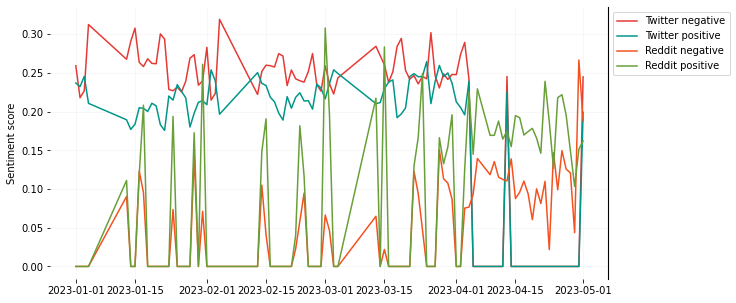

In [163]:
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-05-01')

mask = (combined['date'] >= start_date) & (combined['date'] <= end_date)

# Apply the mask to the DataFrame to select the rows within the date range
selected_rows = combined[mask]
getTimeseriesCombinedGraph(selected_rows)

In [164]:
combined.corr()

,twitter_neg,twitter_pos,twitter_grad_neg,twitter_grad_pos,reddit_neg,reddit_pos,Compound,reddit_grad_neg,reddit_grad_pos,pos_grad,neg_grad
twitter_neg,1.000000,0.732615,0.210003,-0.181186,-0.717137,-0.685250,-0.517710,-0.072692,0.033294,-0.119704,0.153273
twitter_pos,0.732615,1.000000,-0.148543,0.208448,-0.692211,-0.654986,-0.494694,-0.076223,0.008271,0.167701,-0.167784
twitter_grad_neg,0.210003,-0.148543,1.000000,-0.786884,-0.009705,0.000049,-0.000181,-0.012024,0.030086,-0.593596,0.885266
twitter_grad_pos,-0.181186,0.208448,-0.786884,1.000000,0.001683,0.006814,0.015760,0.009648,-0.021261,0.765290,-0.696515
reddit_neg,-0.717137,-0.692211,-0.009705,0.001683,1.000000,0.893663,0.621348,0.251885,-0.003364,-0.000855,0.108511
reddit_pos,-0.685250,-0.654986,0.000049,0.006814,0.893663,1.000000,0.864110,-0.039287,0.180201,0.121327,-0.018230
Compound,-0.517710,-0.494694,-0.000181,0.015760,0.621348,0.864110,1.000000,-0.229935,0.245742,0.170493,-0.107109
reddit_grad_neg,-0.072692,-0.076223,-0.012024,0.009648,0.251885,-0.039287,-0.229935,1.000000,-0.168987,-0.101284,0.454407
reddit_grad_pos,0.033294,0.008271,0.030086,-0.021261,-0.003364,0.180201,0.245742,-0.168987,1.000000,0.627269,-0.051797
pos_grad,-0.119704,0.167701,-0.593596,0.765290,-0.000855,0.121327,0.170493,-0.101284,0.627269,1.000000,-0.575919


In [165]:
def getTimeseriesSentimentGraph(df):
    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    ax=plt.axes()
    ax.patch.set_facecolor('white')
    ax.spines[['top','left','bottom']].set_visible(False)
    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
   
    dfLimits = df.agg({ 'date' : [np.min, np.max]})
    print("New DS limits: ", dfLimits["date"]["amin"])

    fromD = dfLimits["date"]["amin"].strftime("%Y KW %W")
    toD = dfLimits["date"]["amax"].strftime("%Y KW %W")
    plt.title(f"Average monthly sentiment for {fromD} - {toD}")

    #sns.lineplot(x =df['date'].astype(str), y = df['gradient_pos'], legend='full', lw=1.5, label="positive sentiment", color='#36AE7C')
    #sns.lineplot(x =df['date'].astype(str), y = df['gradient_neg'], legend='full', lw=1.5, label="negative sentiment", color='#6495ed')
    sns.lineplot(x =df['date'].astype(str), y = df['positiveSentimentScore'], legend='full', lw=1.5, label="positive sentiment", color='#36AE7C')
    sns.lineplot(x =df['date'].astype(str), y = df['negativeSentimentScore'], legend='full', lw=1.5, label="negative sentiment", color='#6495ed')

    legend = plt.legend(bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.xticks(rotation=90)
    #plt.xticks(np.arange(0, len(df['created']), step=5))  # Customize tick frequency if needed
    # Format x-axis tick labels as desired (e.g., "%Y-%m-%d")
    #plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['date'].dt.strftime("%Y-KW%W")))

    plt.ylabel('Sentiment score')
    plt.xlabel('')
    plt.show()

In [166]:
def getTimeseriesSentimentBarGraph(df):
    #dfLimits = df.agg({ 'date' : [np.min, np.max]})
    #fromD = dfLimits["date"]["amin"].strftime("%d/%m/%Y")
    #toD = dfLimits["date"]["amax"].strftime("%d/%m/%Y")
    #df['date'] = df['date'].dt.strftime("%Y-KW %W")
    dfForChart = df[["date", "negativeSentimentScore", "neutralSentimentScore", "positiveSentimentScore"]]

    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    chart = dfForChart.plot(
        x="date", kind='bar', stacked=True,
        color=['#D14D72', '#89CFF0', '#36AE7C'],
        #title=f"Average monthly sentiment for {fromD} - {toD}",
        figsize=(12,5)
    )
    
    chart.patch.set_facecolor('white')
    # # Make the left spine thicker
    chart.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.legend(bbox_to_anchor=(1, 1))

    plt.ylabel('Sentiment score')
    plt.xlabel('')

    plt.show()


<Figure size 720x360 with 0 Axes>

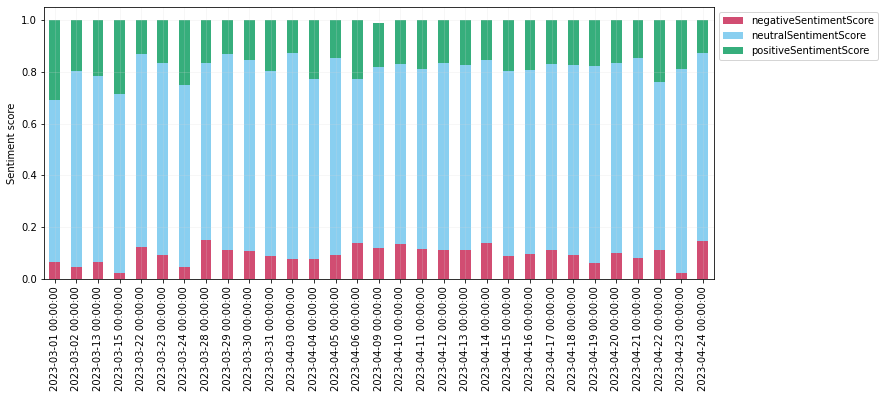

In [169]:
reddit = reddit.sort_values(by="date")
start_date = pd.to_datetime('2023-03-01')
end_date = pd.to_datetime('2023-04-24')

mask = (reddit['date'] >= start_date) & (reddit['date'] <= end_date)

# Apply the mask to the DataFrame to select the rows within the date range
selected_rows = reddit[mask]
#getTimeseriesSentimentGraph(selected_rows)
getTimeseriesSentimentBarGraph(selected_rows)